In [1]:
%run -i ch03.py

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from models import ClassifierModel as CM
from pipelines import NumericPipeline, PIPELINE_NUMERIC

In [3]:
# in the multiclass case, with algorithms that use decision_function,
# sklearn will actually run ovr under the hood (ovo in the case of svm based classifiers)

sgdm = CM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgdm.evaluate(features, labels, cv=3)

In [4]:
# in the multiclass case, with algorithms that use predict_proba,
# sklearn does not need to run ovo or ovr under the hood

rfm = CM(RandomForestClassifier, n_estimators=10, random_state=42)
rfm.evaluate(features, labels, cv=3)

In [7]:
print(rfm.model.classes_)

i = np.argwhere(labels==5)[0][0]
j = np.argwhere(labels!=5)[0][0]

print(i, j)

print(labels[i])
print(sgdm.model.decision_function([features[i]]))
print(rfm.model.predict_proba([features[i]]))
print(labels[j])
print(sgdm.model.decision_function([features[j]]))
print(rfm.model.predict_proba([features[j]]))

[0 1 2 3 4 5 6 7 8 9]
9 0
5
[[-295924.13002741 -311130.39863253 -633109.79704877 -192946.36642992
  -315016.02943639  135727.65714266 -389164.62531325 -468592.88542621
    -5651.31034838 -401797.26587679]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
6
[[-436252.60287947 -558859.72663693 -149793.04184363 -203472.74691624
  -117032.11586857 -133965.33187057  249375.70206322 -681936.85002409
  -194649.11432779 -241070.65216712]]
[[0.1 0.  0.  0.  0.  0.  0.8 0.  0.1 0. ]]


In [9]:
print('SGDM', sgdm.cv_score())
print('RFM', rfm.cv_score())

SGDM [0.85807838 0.86354318 0.87583137]
RFM [0.94366127 0.94189709 0.94154123]


In [11]:
# if we use scaling, algorithms that user decision_function will benefit more strongly
array = features.astype(np.float64)
frame = pd.DataFrame(data=array)

pipeline = NumericPipeline(frame)

array = pipeline.fit_transform(frame)

sgdm.evaluate(array, labels, cv=3)

print(sgdm.cv_score())

[0.91141772 0.90759538 0.90858629]


In [12]:
# remember - rows are actual classes, columns are predictions

sgdm.matrix

array([[5735,    2,   23,   11,   11,   45,   43,   10,   40,    3],
       [   2, 6475,   43,   25,    6,   39,    6,   12,  121,   13],
       [  57,   35, 5315,  100,   83,   24,  107,   60,  162,   15],
       [  51,   43,  137, 5339,    3,  223,   38,   52,  138,  107],
       [  21,   25,   35,    6, 5371,    8,   54,   33,   85,  204],
       [  73,   44,   32,  198,   78, 4591,  111,   31,  167,   96],
       [  35,   25,   42,    2,   40,   95, 5627,    6,   45,    1],
       [  21,   19,   61,   25,   55,   10,    7, 5807,   15,  245],
       [  55,  154,   73,  169,   13,  158,   56,   28, 5006,  139],
       [  44,   31,   27,   85,  159,   32,    2,  203,   80, 5286]])

In [13]:
matrix = sgdm.matrix / sgdm.matrix.sum(axis=1, keepdims=True)
fmt = lambda x: f'{x:.4f}'
np.array2string(matrix, formatter={'float_kind': fmt}).split('\n')

['[[0.9683 0.0003 0.0039 0.0019 0.0019 0.0076 0.0073 0.0017 0.0068 0.0005]',
 ' [0.0003 0.9604 0.0064 0.0037 0.0009 0.0058 0.0009 0.0018 0.0179 0.0019]',
 ' [0.0096 0.0059 0.8921 0.0168 0.0139 0.0040 0.0180 0.0101 0.0272 0.0025]',
 ' [0.0083 0.0070 0.0223 0.8708 0.0005 0.0364 0.0062 0.0085 0.0225 0.0175]',
 ' [0.0036 0.0043 0.0060 0.0010 0.9194 0.0014 0.0092 0.0056 0.0145 0.0349]',
 ' [0.0135 0.0081 0.0059 0.0365 0.0144 0.8469 0.0205 0.0057 0.0308 0.0177]',
 ' [0.0059 0.0042 0.0071 0.0003 0.0068 0.0161 0.9508 0.0010 0.0076 0.0002]',
 ' [0.0034 0.0030 0.0097 0.0040 0.0088 0.0016 0.0011 0.9269 0.0024 0.0391]',
 ' [0.0094 0.0263 0.0125 0.0289 0.0022 0.0270 0.0096 0.0048 0.8556 0.0238]',
 ' [0.0074 0.0052 0.0045 0.0143 0.0267 0.0054 0.0003 0.0341 0.0134 0.8886]]']

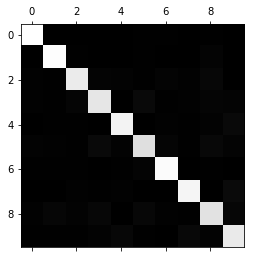

In [14]:
plt.matshow(matrix, cmap=plt.cm.gray)
plt.show()

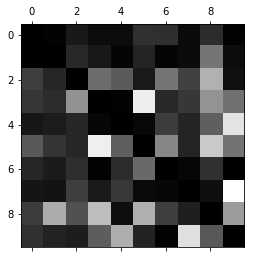

In [15]:
np.fill_diagonal(matrix, 0)
plt.matshow(matrix, cmap=plt.cm.gray)
plt.show()

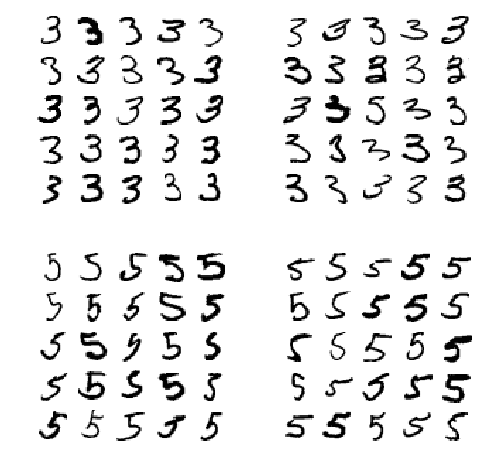

In [17]:
x33 = features[(labels == 3) & (sgdm.predictions == 3)][:25]
x35 = features[(labels == 3) & (sgdm.predictions == 5)][:25]
x53 = features[(labels == 5) & (sgdm.predictions == 3)][:25]
x55 = features[(labels == 5) & (sgdm.predictions == 5)][:25]

plt.figure(figsize=(8, 8))

plt.subplot(221)
visualize_mnist_multi(x33, images_per_row=5)
plt.subplot(222)
visualize_mnist_multi(x35, images_per_row=5)
plt.subplot(223)
visualize_mnist_multi(x53, images_per_row=5)
plt.subplot(224)
visualize_mnist_multi(x55, images_per_row=5)

plt.show()